In [4]:
import pandas as pd
from IPython.core.display import HTML
from IPython.core.display import Image 
%load_ext music21.ipython21.ipExtension
import numpy as np
import music21 as mu
import pymongo
%pylab inline
from pymongo import MongoClient
from bs4 import BeautifulSoup
import re
import pydash as py_
pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)
import math
import music21 as mu
from functools import partial

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)


Populating the interactive namespace from numpy and matplotlib


In [5]:
muAutumnLeaves = mu.converter.parse('FinalDataSet/XMLFiles/JazzSolos/KJAutumnLeaves1996_1371_192.xml')
muStellaByStarlight = mu.converter.parse('FinalDataSet/XMLFiles/JazzSolos/KJStellaByStarlight1983_1534_161.xml')
muGroovinHigh = mu.converter.parse('FinalDataSet/XMLFiles/JazzSolos/KJGroovinHigh1999_1996_290.xml')
muAllTheThingsYouAre = mu.converter.parse('FinalDataSet/XMLFiles/JazzSolos/KJAllTheThingsYouAre1983_2143_290.xml')
muIfIWereABell = mu.converter.parse('FinalDataSet/XMLFiles/JazzSolos/KJIfIWereABell2002_2161_227.xml')

<h2>Data Preparation</h2>

In [6]:
df = pd.read_pickle('data_set_as_pk.pkl')

<h4><a id="microphrase">Harmony and Rhythm</a></h4>

<div>We have not looked at harmony at all until now, regardless of underlying harmony notes operate in similar ways, there does emerge Contours, similiarieis, repeition of partial. But what about about harmony? There are patterns that emerge both in the sequence of chords and the types of chords that can be seen. just using basic chords here. Intereesting questions about idiomatic devices</div>

<div>In the following section we will look at note choice, but also voice leading, do major sevenths lead roots, what is happening</div>

<div>First to notice is that chords have structre - below shows the distribution of differnt chords used. So it doesn't seem the the case more of a particular type of chord, but this music practice chaaracterised by distribution....</div>

In [7]:
def getNextChord(data_row):
    veryNextChord = None
    if data_row['nextTenChordTypes']:
        veryNextChord = data_row['nextTenChordTypes'][0:1][0]
    return veryNextChord

def getNextChordBass(data_row):
    veryNextChordRoot = None
    currentChordRoot = None
    if data_row['nextTenChords']:
        veryNextChordRoot = data_row['nextTenChords'][0:1]
        currentChordRoot = data_row['chordRootAsInt']
        veryNextChordRoot = veryNextChordRoot[0] - currentChordRoot
        if veryNextChordRoot < 0:
            veryNextChordRoot = veryNextChordRoot + 12
        #veryNextChordRoot = abs(veryNextChordRoot %12)
        
    return veryNextChordRoot
    
#chords = df[df['chordTypeDisplay'] == 'dom7']

df['veryNextChordType'] = df.apply(getNextChord, axis=1)
df['veryNextChordRootAsInt'] = df.apply(getNextChordBass, axis=1)

<div>Major sevents and dominant sevenths are used very heavily and this makes intuitive sense</div>

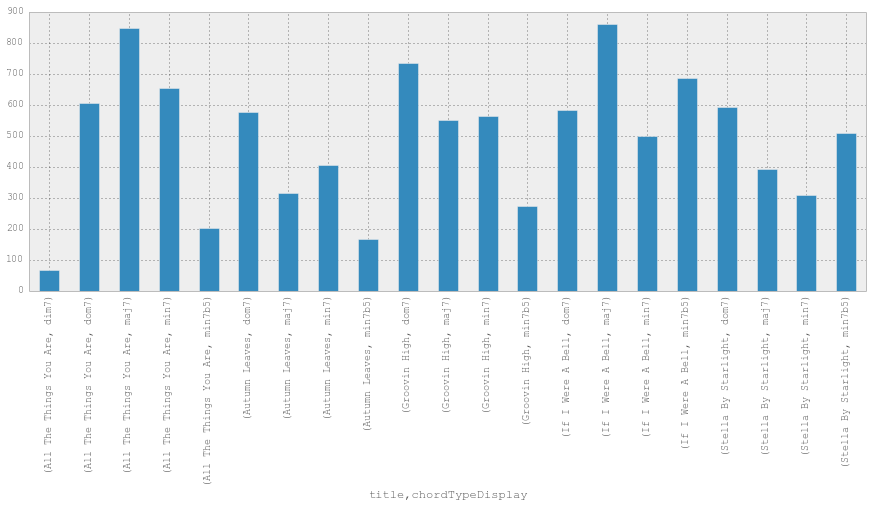

In [8]:
df.groupby(['title', 'chordTypeDisplay'])['chordTypeDisplay'].count().plot(kind="bar")

<div>Two interesting questions emerge, one is note choice - her questions kinds of notes are played over a dominant sevent chord. What about a major seventh chord. Are some notes more common that others. How often is a major seventh chord. THere are lots o guidelines but what are they There is a tendency. We can talk about rhythm also, do certain notes occcur at certain times. Major seventh played off the beat on the dominant chord. Prior, generally, leaving all esle aside,  </div>
<div>
another questions is about sequences in chords, chord progressions. Are there relationships between chords and other chords
</div>

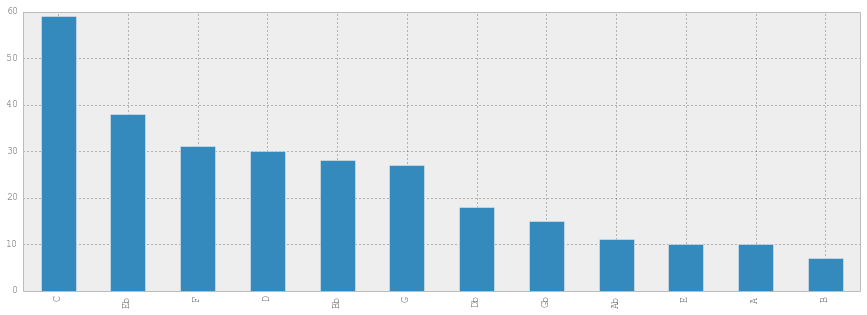

In [9]:
df[df['chordDisplayName'] == 'C min7b5']['normalisedFrequenciesNoOctave'].value_counts()[1:].plot(kind="bar")

<div>THen chords in depth with degrees. The first thing to notice is that there appears to be some kind of relatinoship from all notes to the harmony, but different intensities. Consider the above minor seventh flat five and the below major chord </div>

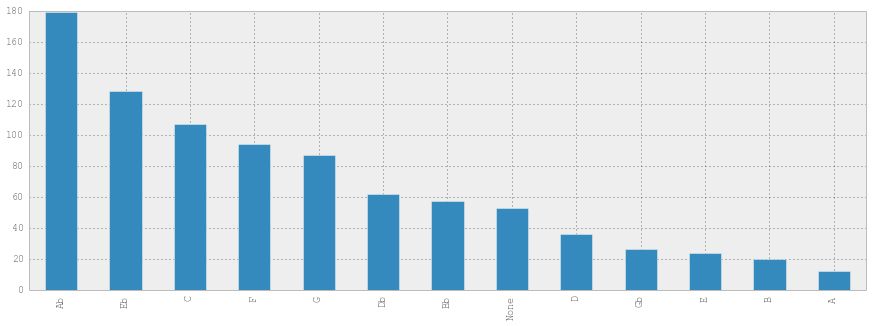

In [10]:
df[df['chordDisplayName'] == 'Ab maj7']['normalisedFrequenciesNoOctave'].value_counts().plot(kind="bar")

<div>So harmony has come kind of meaning above shows that there harmony has meaning here. A c minor7 b5 chord has certain notes. There are some interesting things, keith jarrett uses major ninth. A major chord has notes. But in both cases, all notes are in play</div>

<div>What types of chords are here. problematic to use chord extensions as the notes played and subsitution will bear that out. below hows over all, which chords are in play. Across the entire corpus there are different used chords. The diminised is very rare </div>

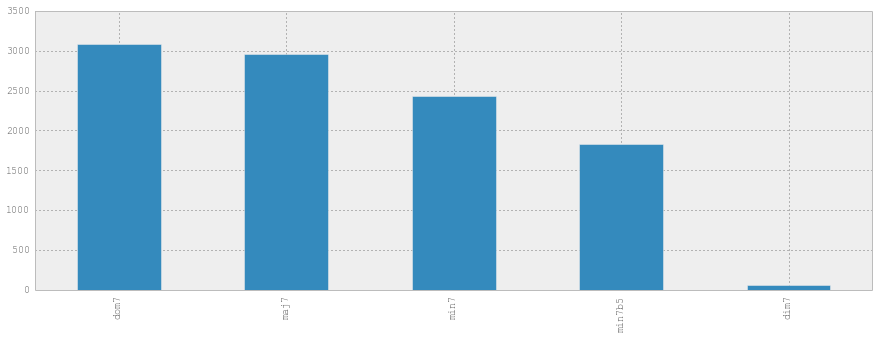

In [49]:
df['chordTypeDisplay'].value_counts().plot(kind="bar")

<div>Other thing to check out is progressions - movement between chords - overwhemingly through cycle of fourths. Taking into count, the next chord, what is happening</div>

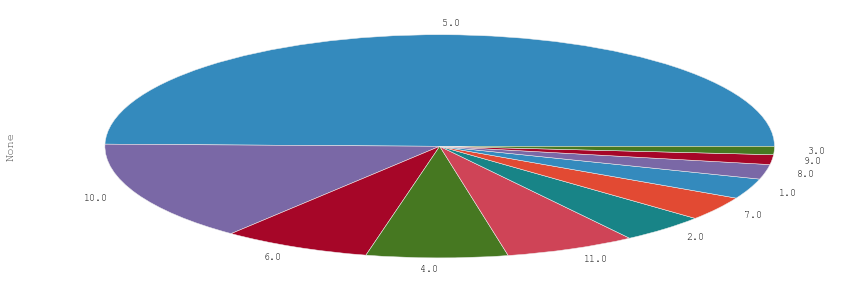

In [13]:
df['veryNextChordRootAsInt'].value_counts().plot(kind="pie")

<div>Immedietel question, is what type of degrees are used. THis again is iutivive, relathioship between cycle of fourths, cadence material</div>
<div>THe data allows a far more granular approach, how chords are moving</div>

In [52]:
df.groupby(['chordTypeDisplay','veryNextChordType','veryNextChordRootAsInt'])['chordDisplayName'].count()

chordTypeDisplay  veryNextChordType  veryNextChordRootAsInt
dim7              min7               11                          67
dom7              maj7               1                          137
                                     2                          146
                                     5                          863
                                     10                          38
                  min7               3                           50
                                     4                           80
                                     5                         1198
                                     6                           62
                                     7                           72
                                     9                           70
                                     10                         267
                  min7b5             5                          104
maj7              dom7               5                  

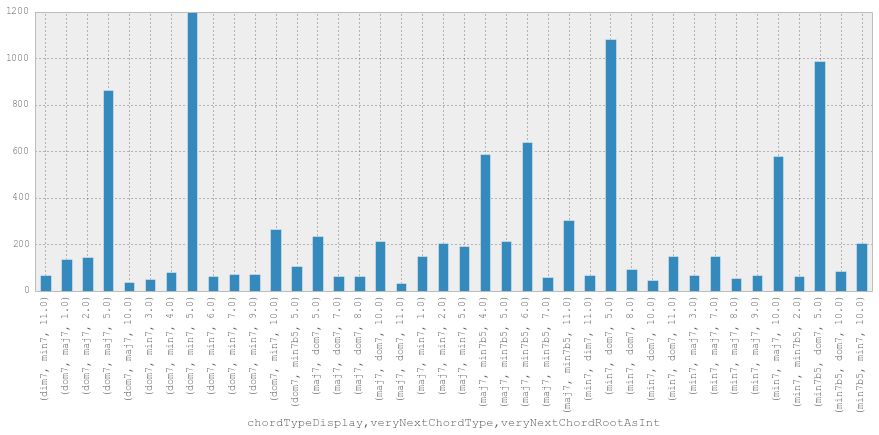

In [37]:
df.groupby(['chordTypeDisplay','veryNextChordType','veryNextChordRootAsInt'])['chordDisplayName'].count().plot(kind="bar")

<div>So above we see pathways spike moving in fourths</div>

<div>Returning to note degrees, are played, it is possible to look at the roots, broadly stepping back finds some trends, that regarldess of song, jarrett uses root heavily. </div>

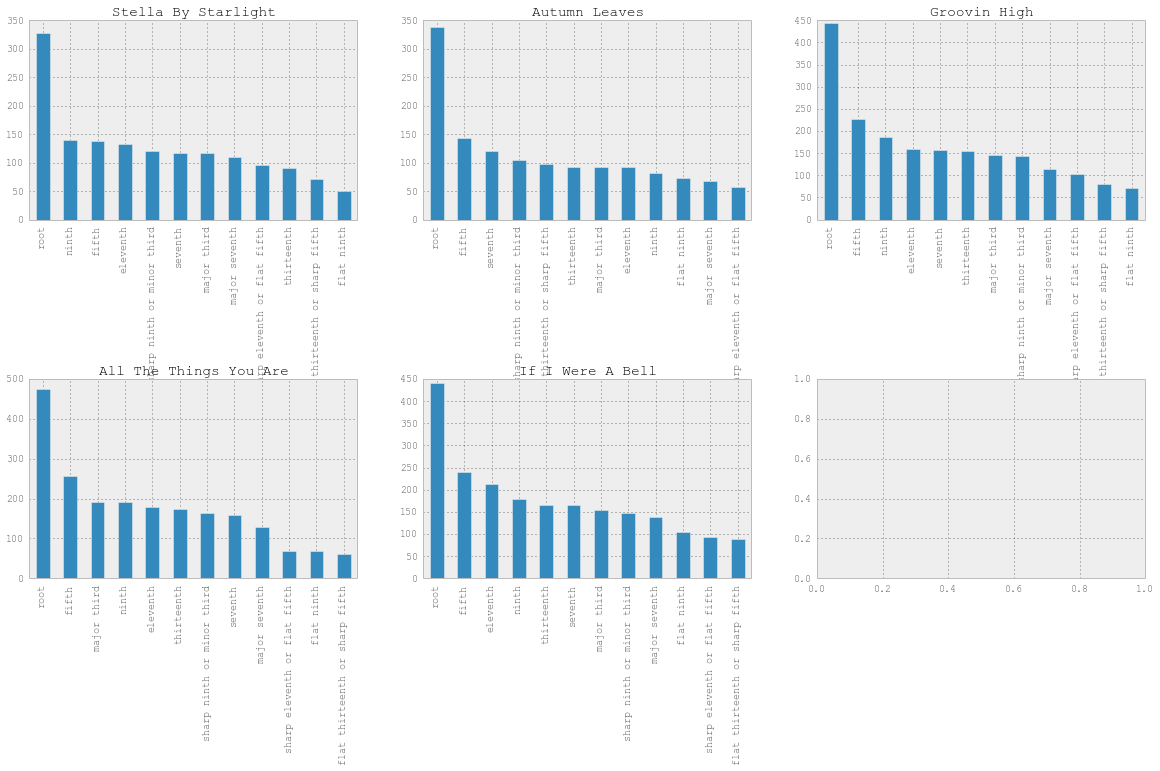

In [14]:
fig, axes = plt.subplots(nrows=2,ncols=3)

df[df['title'] == 'Stella By Starlight']['harmonicFunctionOfNote'].value_counts().plot(kind="bar", ax=axes[0,0], figsize=(20, 10), title='Stella By Starlight')
df[df['title'] == 'Autumn Leaves']['harmonicFunctionOfNote'].value_counts().plot(kind="bar", ax=axes[0,1], figsize=(20, 10), title='Autumn Leaves')
df[df['title'] == 'Groovin High']['harmonicFunctionOfNote'].value_counts().plot(kind="bar", ax=axes[0,2], figsize=(20, 10), title='Groovin High')
df[df['title'] == 'All The Things You Are']['harmonicFunctionOfNote'].value_counts().plot(kind="bar", ax=axes[1,0], figsize=(20, 10), title='All The Things You Are')
df[df['title'] == 'If I Were A Bell']['harmonicFunctionOfNote'].value_counts().plot(kind="bar", ax=axes[1,1], figsize=(20, 10), title='If I Were A Bell')
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.8)

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.3   # the bottom of the subplots of the figure
top = 2      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 2   # the amount of height reserved for white space between subplots

<div>Above shows the flattended fith is not as important typcial jazz. But in corea if functions differently</div>

<div>So that is some general remarks, but what about looking more closely at particular chord types. One thing to do is look at Dominant chords. But to look at dominant chords, how does note choice behave in terms of harmony. We know melodically there is a preference for small leaps, but harmonically how do things behave</div>

<div>Again with dom, heavy use of the root note. So how exactly is the root note used in Jarrett's solos</div>

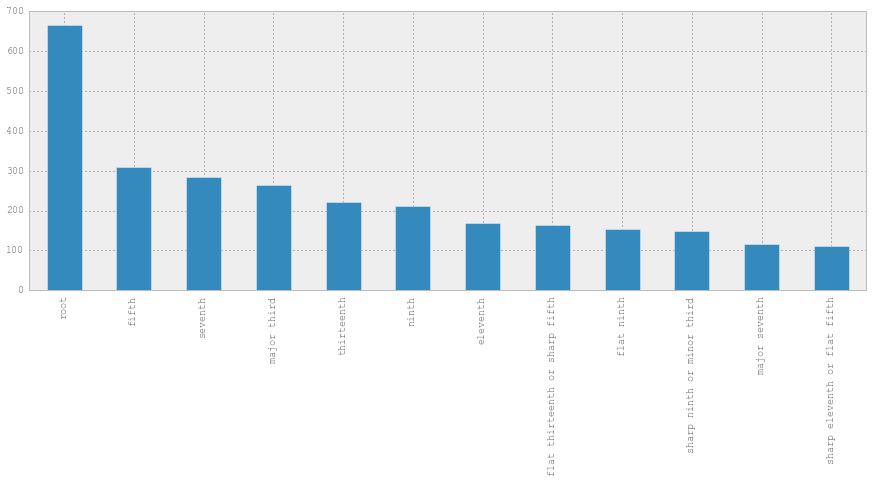

In [53]:
df[df['chordTypeDisplay'] == 'dom7']['harmonicFunctionOfNote'].value_counts().plot(kind="bar")

<div> The first thing to notice is that the root is really dominant - this goes against seventh and third stuff, fifth is important also, and is a trend across all the solos </div>

<div>Break it down by song</div>

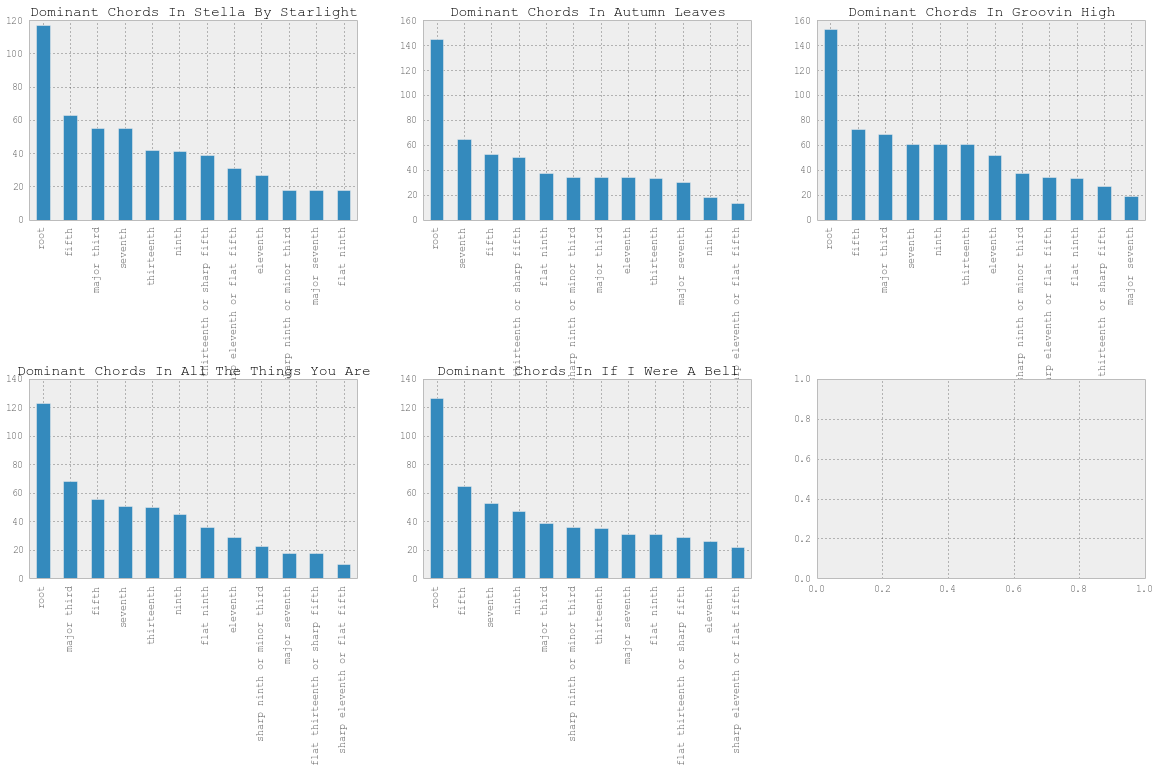

In [54]:
#df1 = df[(df.a != -1) & (df.b != -1)]
fig, axes = plt.subplots(nrows=2,ncols=3)

df[(df['title'] == 'Stella By Starlight') & (df['chordTypeDisplay'] == 'dom7')]['harmonicFunctionOfNote'].value_counts().plot(kind="bar", ax=axes[0,0], figsize=(20, 10), title='Dominant Chords In Stella By Starlight')
df[(df['title'] == 'Autumn Leaves') & (df['chordTypeDisplay'] == 'dom7')]['harmonicFunctionOfNote'].value_counts().plot(kind="bar", ax=axes[0,1], figsize=(20, 10), title='Dominant Chords In Autumn Leaves')
df[(df['title'] == 'Groovin High') & (df['chordTypeDisplay'] == 'dom7')]['harmonicFunctionOfNote'].value_counts().plot(kind="bar", ax=axes[0,2], figsize=(20, 10), title='Dominant Chords In Groovin High')
df[(df['title'] == 'All The Things You Are') & (df['chordTypeDisplay'] == 'dom7')]['harmonicFunctionOfNote'].value_counts().plot(kind="bar", ax=axes[1,0], figsize=(20, 10), title='Dominant Chords In All The Things You Are')
df[(df['title'] == 'If I Were A Bell') & (df['chordTypeDisplay'] == 'dom7')]['harmonicFunctionOfNote'].value_counts().plot(kind="bar", ax=axes[1,1], figsize=(20, 10), title='Dominant Chords In If I Were A Bell')
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.8)

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.3   # the bottom of the subplots of the figure
top = 2      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 2   # the amount of height reserved for white space between subplots

<div>However the root is not played more often, it occurs in come kind of context. It is proceeded by paritcular notes, and followed by other notes is key here. but how is it behaving. The root doesn't just appear as a statistically most common note - it is rather quiet different, it is driven what happens before and what happens afterw which is a questions</div>

<div>So how is the root prepared, in terms of voice leading</div>

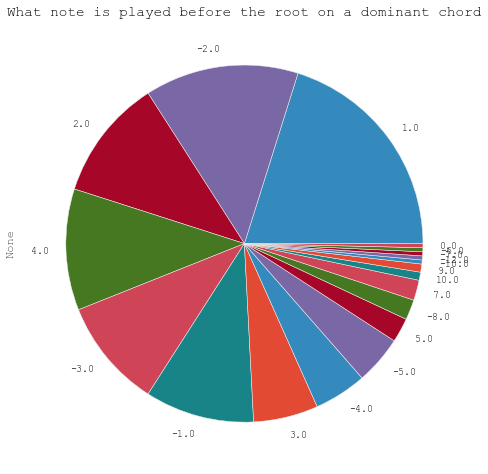

In [18]:
df[(df['part'] == 'P1') &(df['harmonicFunctionOfNote'] == 'root') & (df['chordTypeDisplay'] == 'dom7')]['prevNoteFreqDistance'].value_counts().plot(kind="pie", figsize=(8,8), title='What note is played before the root on a dominant chord')

<div>Overall, the use of the root chord is very structured, over 50 percent of cases, there are ony 4 possible note shtat come before it. Some of this is the predominance in tones and semitones, use of a major third how does each note  in terms of the various solos </div>

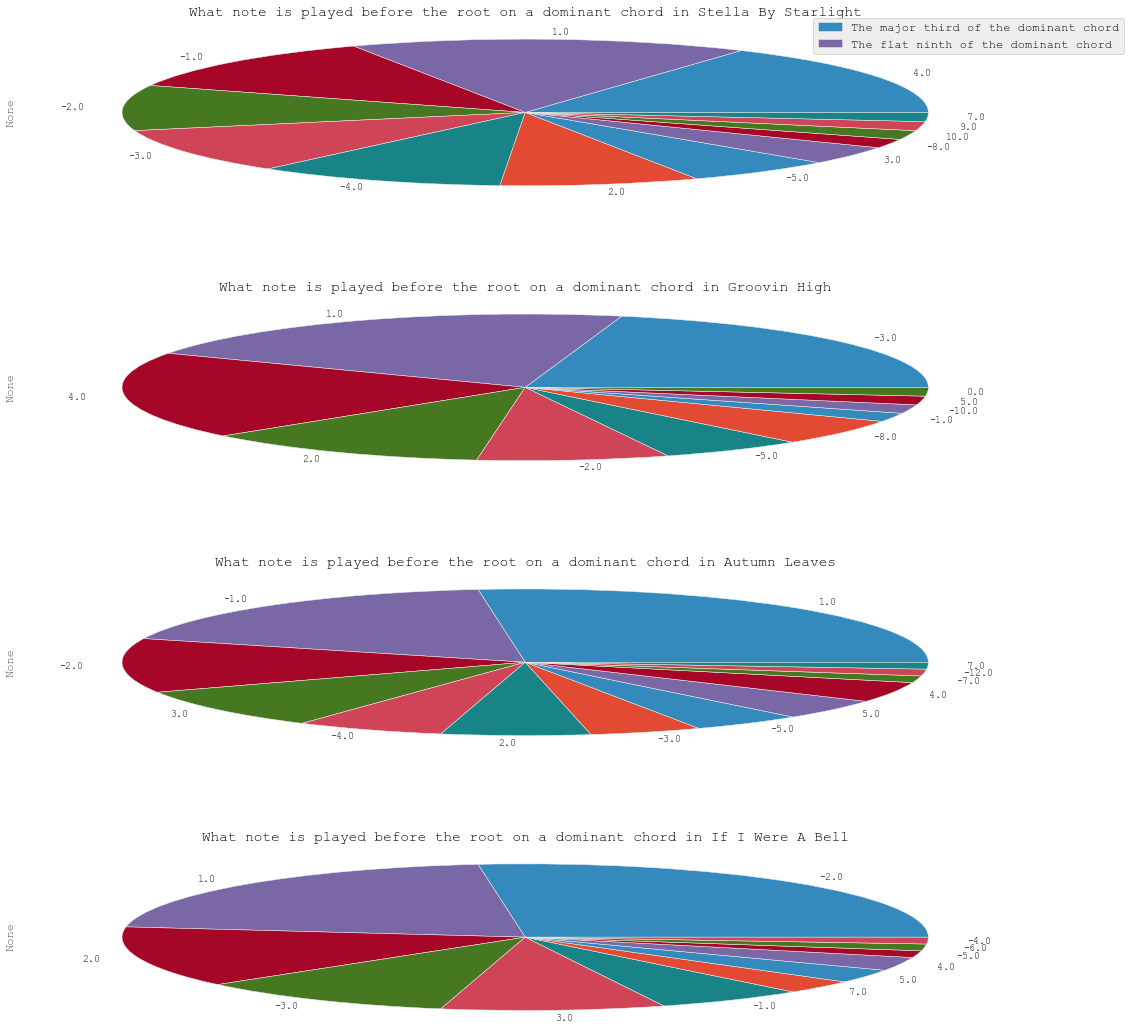

In [57]:
fig, axes = plt.subplots(nrows=4,ncols=1)

df[(df['part'] == 'P1') & (df['title'] == 'Stella By Starlight') & (df['harmonicFunctionOfNote'] == 'root') & (df['chordTypeDisplay'] == 'dom7')]['prevNoteFreqDistance'].value_counts().plot(kind="pie", figsize=(7,7), ax=axes[0], title='What note is played before the root on a dominant chord in Stella By Starlight')
df[(df['part'] == 'P1') & (df['title'] == 'Groovin High') & (df['harmonicFunctionOfNote'] == 'root') & (df['chordTypeDisplay'] == 'dom7')]['prevNoteFreqDistance'].value_counts().plot(kind="pie", figsize=(7,7), ax=axes[1], title='What note is played before the root on a dominant chord in Groovin High')
df[(df['part'] == 'P1') & (df['title'] == 'Autumn Leaves') & (df['harmonicFunctionOfNote'] == 'root') & (df['chordTypeDisplay'] == 'dom7')]['prevNoteFreqDistance'].value_counts().plot(kind="pie", figsize=(7,7), ax=axes[2], title='What note is played before the root on a dominant chord in Autumn Leaves')
df[(df['part'] == 'P1') & (df['title'] == 'If I Were A Bell') & (df['harmonicFunctionOfNote'] == 'root') & (df['chordTypeDisplay'] == 'dom7')]['prevNoteFreqDistance'].value_counts().plot(kind="pie", figsize=(7,7), ax=axes[3], title='What note is played before the root on a dominant chord in If I Were A Bell')

axes[0].legend(['The major third of the dominant chord', 'The flat ninth of the dominant chord'])

axes[0].legend(['The major third of the dominant chord', 'The flat ninth of the dominant chord'],bbox_to_anchor=(1.1, 1.05))

left  = 1.0  # the left side of the subplots of the figure
right = 3.0    # the right side of the subplots of the figure
bottom = 1.0   # the bottom of the subplots of the figure
top = 3.0      # the top of the subplots of the figure
wspace = 0   # the amount of width reserved for blank space between subplots
hspace = 0   # the amount of height reserved for white space between subplots

subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=None, hspace=None)



<div>This unusual. It it more to do with progression, or chord minor or major, challenges play on a dominant chord, but says that dominant chords appear to be treated differently depening on the overall song. But as a musicin this seems counter inutivie It suggests that it is not the full story. constrain results to V I and include tonality of minor or major. So good idea to look at</div>
<div>Limit the dominant chords under consideration here, to just those V of a major chord, (such as G7 moving to C major). As opposed to G dom7 leading to F# minor 7 b5

<div>So looking at dominants</div>

In [61]:
dfV_Imaj = df[(df['part'] == 'P1') &(df['chordTypeDisplay'] == 'dom7') &(df['veryNextChordType'] == 'maj7') & (df['veryNextChordRootAsInt'] == 5) ]

In [95]:
dfV_Imaj['title'].value_counts()

All The Things You Are    411
Autumn Leaves             135
Stella By Starlight        94
If I Were A Bell           60
Groovin High               55
dtype: int64

<div> Return to looking at the root, now that we have limited the data set to only be root used and in a V I Major</div>

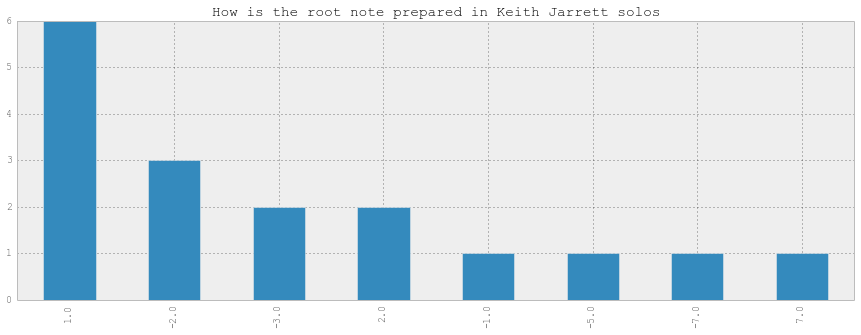

In [89]:
dfV_Imaj[(dfV_Imaj['harmonicFunctionOfNote'] == 'root') & (dfV_Imaj['title'] == 'Autumn Leaves')]['prevNoteFreqDistance'].value_counts().plot(kind="bar", title="How is the root note prepared in Keith Jarrett solos")

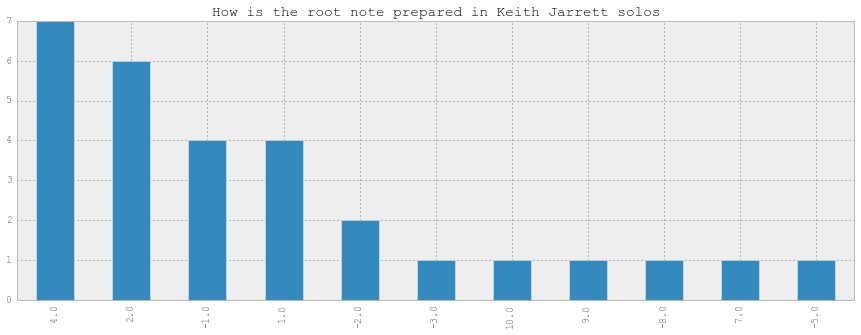

In [90]:
dfV_Imaj[(dfV_Imaj['harmonicFunctionOfNote'] == 'root') & (dfV_Imaj['title'] == 'All The Things You Are')]['prevNoteFreqDistance'].value_counts().plot(kind="bar", title="How is the root note prepared in Keith Jarrett solos")

<div>What about a minor progression</div>

In [96]:
#dfV_Imaj[(dfV_Imaj['harmonicFunctionOfNote'] == 'root') & (dfV_Imaj['If I Were A Bell'] == 'All The Things You Are')]['prevNoteFreqDistance'].value_counts().plot(kind="bar", title="How is the root note prepared in Keith Jarrett solos")

In [104]:
dfV_Imaj[dfV_Imaj['title'] == 'Groovin High'].sort('harmonicFunctionOfNote')

,chordDisplayName,restFlag,performerName,composerName,genre,numberOfParts,title,yearOfComposition,yearOfPerformance,ongoingTempo,part,quarterNoteDuration,midiNumber,noteDisplayName,noteDisplayNameNoOctave,nextNoteFreqDistance,prevNoteFreqDistance,normalisedFrequencies,normalisedFrequenciesNoOctave,noteEventLocation,noteEventStartingLocation,measure,Location in measure,chordRootAsInt,chordTypeAsInt,chordBassAsInt,chordTypeDisplay,distanceFromNoteToChordRoot,distanceFromNoteToChordBass,harmonicFunctionOfNote,nextTenChords,nextTenChordTypes,veryNextChordType,veryNextChordRootAsInt
606,Bb dom7,note,Keith Jarrett,Dizzy Gillespie,jazz,2,Groovin High,1943,1999,120,P1,0.50,51,Eb4,Eb,-3,1,Eb4,Eb,325.98,325.48,82,1.48,10,NaN,-1,dom7,5,None,eleventh,"[3.0, 9.0, 2.0, 3.0, 7.0, 0.0, 5.0, 10.0, 5.0,...","[maj7, min7b5, dom7, maj7, min7b5, dom7, min7,...",maj7,5
378,Bb dom7,note,Keith Jarrett,Dizzy Gillespie,jazz,2,Groovin High,1943,1999,120,P1,0.50,63,Eb5,Eb,-3,4,Eb5,Eb,198.98,198.48,50,2.48,10,NaN,-1,dom7,5,None,eleventh,"[3.0, 9.0, 2.0, 3.0, 7.0, 0.0, 5.0, 10.0, 5.0,...","[maj7, min7b5, dom7, maj7, min7b5, dom7, min7,...",maj7,5
381,Bb dom7,note,Keith Jarrett,Dizzy Gillespie,jazz,2,Groovin High,1943,1999,120,P1,0.50,63,Eb5,Eb,1,-7,Eb5,Eb,200.48,199.98,50,3.98,10,NaN,-1,dom7,5,None,eleventh,"[3.0, 9.0, 2.0, 3.0, 7.0, 0.0, 5.0, 10.0, 5.0,...","[maj7, min7b5, dom7, maj7, min7b5, dom7, min7,...",maj7,5
1297,Bb dom7,note,Keith Jarrett,Dizzy Gillespie,jazz,2,Groovin High,1943,1999,120,P1,0.50,63,Eb5,Eb,-3,-3,Eb5,Eb,709.43,708.93,178,0.93,10,NaN,-1,dom7,5,None,eleventh,"[3.0, 9.0, 2.0, 3.0, 7.0, 0.0, 5.0, 10.0, 5.0,...","[maj7, min7b5, dom7, maj7, min7b5, dom7, min7,...",maj7,5
1303,Bb dom7,note,Keith Jarrett,Dizzy Gillespie,jazz,2,Groovin High,1943,1999,120,P1,1.00,63,Eb5,Eb,NaN,-1,Eb5,Eb,712.92,711.92,178,3.92,10,NaN,-1,dom7,5,None,eleventh,"[3.0, 9.0, 2.0, 3.0, 7.0, 0.0, 5.0, 10.0, 5.0,...","[maj7, min7b5, dom7, maj7, min7b5, dom7, min7,...",maj7,5
1543,Bb dom7,note,Keith Jarrett,Dizzy Gillespie,jazz,2,Groovin High,1943,1999,120,P1,0.50,63,Eb5,Eb,-3,-4,Eb5,Eb,837.42,836.92,210,0.92,10,NaN,-1,dom7,5,None,eleventh,"[3.0, 9.0, 2.0, 3.0, 7.0, 0.0, 5.0, 10.0, 5.0,...","[maj7, min7b5, dom7, maj7, min7b5, dom7, min7,...",maj7,5
1760,Bb dom7,note,Keith Jarrett,Dizzy Gillespie,jazz,2,Groovin High,1943,1999,120,P1,0.50,63,Eb5,Eb,-3,3,Eb5,Eb,966.42,965.92,242,1.92,10,NaN,-1,dom7,5,None,eleventh,"[3.0, 9.0, 2.0, 3.0, 7.0, 0.0, 5.0, 10.0, 5.0,...","[maj7, min7b5, dom7, maj7, min7b5, dom7, min7,...",maj7,5
830,Bb dom7,note,Keith Jarrett,Dizzy Gillespie,jazz,2,Groovin High,1943,1999,120,P1,1.00,65,F5,F,NaN,2,F5,F,454.97,453.97,114,1.97,10,NaN,-1,dom7,7,None,fifth,"[3.0, 9.0, 2.0, 3.0, 7.0, 0.0, 5.0, 10.0, 5.0,...","[maj7, min7b5, dom7, maj7, min7b5, dom7, min7,...",maj7,5
1763,Bb dom7,note,Keith Jarrett,Dizzy Gillespie,jazz,2,Groovin High,1943,1999,120,P1,0.50,65,F5,F,-4,-9,F5,F,967.92,967.42,242,3.42,10,NaN,-1,dom7,7,None,fifth,"[3.0, 9.0, 2.0, 3.0, 7.0, 0.0, 5.0, 10.0, 5.0,...","[maj7, min7b5, dom7, maj7, min7b5, dom7, min7,...",maj7,5
1301,Bb dom7,note,Keith Jarrett,Dizzy Gillespie,jazz,2,Groovin High,1943,1999,120,P1,0.33,65,F5,F,-3,2,F5,F,711.59,711.26,178,3.26,10,NaN,-1,dom7,7,None,fifth,"[3.0, 9.0, 2.0, 3.0, 7.0, 0.0, 5.0, 10.0, 5.0,...","[maj7, min7b5, dom7, maj7, min7b5, dom7, min7,...",maj7,5


In [108]:
df[df['chordDisplayName'] == 'Bb dom7']['harmonicFunctionOfNote'].value_counts()

root                              127
fifth                              73
seventh                            69
major third                        58
ninth                              53
thirteenth                         41
eleventh                           39
sharp ninth or minor third         32
flat ninth                         30
sharp eleventh or flat fifth       23
flat thirteenth or sharp fifth     23
major seventh                      14
dtype: int64

<div>What about afterward the root note plays, what is happening</div>

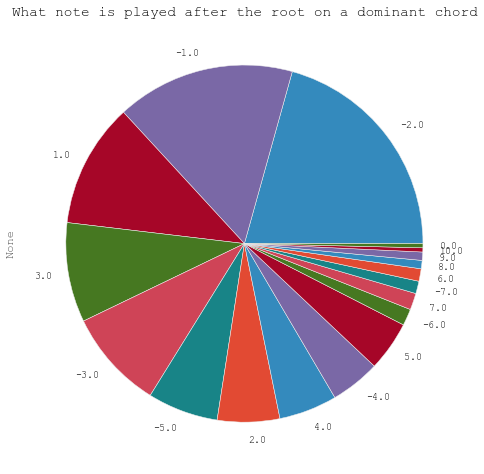

In [17]:
df[(df['part'] == 'P1') &(df['harmonicFunctionOfNote'] == 'root') & (df['chordTypeDisplay'] == 'dom7')]['nextNoteFreqDistance'].value_counts().plot(kind="pie", figsize=(8,8), title='What note is played after the root on a dominant chord')

In [18]:
note0 = mu.note.Note("F5")
note0.duration.type = 'half'
note1 = mu.note.Note("C4")
note1.duration.type = 'eighth'
note2 = mu.note.Note("F#4")

streamOne = mu.stream.Stream()
streamOne.append(note0)
streamOne.append(note1)
streamOne.append(note2)

In [19]:
#streamOne.show()

<div>The first thing we might ask is to keep key relvant. what is the most common figure that might be found</div>

<h4><a id="rhythm">The use of rhythm !!!!!</a></h4>

<h4><a id="tempo">The influence of tempo!!!!</a></h4>

<h4><a id="timeSignaure">The influence of time signature!!!!</a></h4>

<h4><a id="songLocation">How melodic phrases are affected by the place they occur!!!</a></h4>

<h4><a id="songLocation">More so[histicated stuff</a></h4>

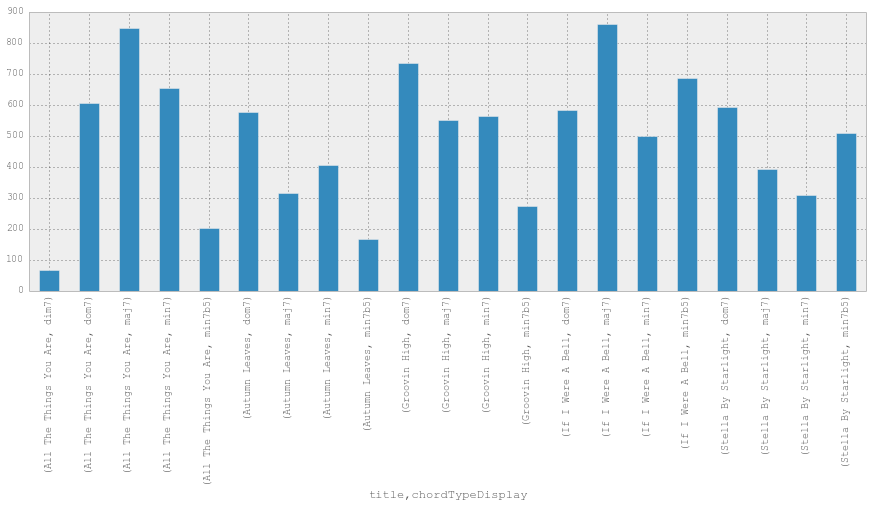